In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd

# progress bar
from tqdm import tqdm

In [2]:
# !pip install tqdm
# !pip install multiprocess
ab = 'a'
print(type(ab))

<class 'str'>


In [3]:
print(tf.config.list_physical_devices())
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.15.0


In [4]:
# pathh = 'MNISTClassifier'

# for parent, dirs, files in os.walk(pathh, topdown=False):
#   for file in files:
#     file_path = os.path.join(parent, file)
#     os.remove(file_path)
#   for dir in dirs:
#     dir_path = os.path.join(parent, dir)
#     os.rmdir(dir_path)

# os.rmdir('./MNISTClassifier')

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
# x_train, x_test = images, test_images
# y_train, y_test = labels, test_labels

In [6]:
train_images = np.asarray([cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in train_images])
test_images = np.asarray([cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in test_images])

In [7]:
train_images = [cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in train_images]
train_images = np.asarray(train_images)


In [8]:
test_images = [cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in test_images]
test_images = np.asarray(test_images)


In [9]:
print(train_images.shape, test_images.shape)

(60000, 64, 64, 3) (10000, 64, 64, 3)


In [10]:
print('x_train.shape', train_images.shape)
print('y_train.shape', train_images.shape)


x_train.shape (60000, 64, 64, 3)
y_train.shape (60000, 64, 64, 3)


In [11]:
full_dataset = np.concatenate((train_images, test_images), axis=0)
full_dataset.shape

(70000, 64, 64, 3)

In [12]:
full_dataset.shape

(70000, 64, 64, 3)

In [13]:
full_dataset_label = np.concatenate((train_labels, test_labels), axis=0)
full_dataset_label.shape

(70000,)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(full_dataset,full_dataset_label, random_state=104, test_size=0.1, shuffle=True )

In [15]:
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
# print('x_val.shape', x_val.shape)
# print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_train.shape (63000, 64, 64, 3)
y_train.shape (63000,)
x_test.shape (7000, 64, 64, 3)
y_test.shape (7000,)


(64, 64, 3)


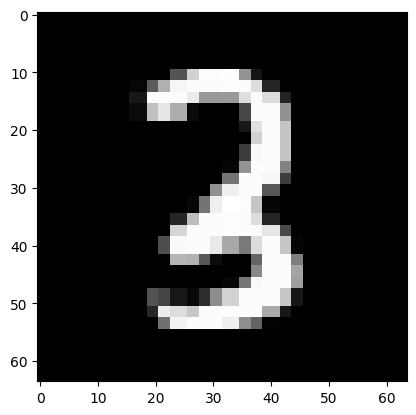

In [16]:
x_test_43 = x_test[35]

print(x_test_43.shape)
digit = x_test_43
fig = plt.figure
plt.imshow(digit)
# print(x_test_43)

#twos are located at [(1, 2), (35, 2), (38, 2), (43, 2), (47, 2), (72, 2), (77, 2), (82, 2), (106, 2), (119, 2)]

In [17]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)
#select labels that are digit 2

[(11, 2), (20, 2), (24, 2), (37, 2), (46, 2), (56, 2), (60, 2), (65, 2), (68, 2), (78, 2)]


In [27]:
def get_10_random_samples_for_trail(x_test, y_test, total=10):
    upper_limit = len(x_test) + 1
    lower_limit = 1
    load = []
    for _ in range(total):
        selector = np.random.randint(lower_limit, upper_limit, dtype=int)
        an_img = tf.reshape(x_test[selector], (-1, 64, 64, 3))
        print('titi', type(y_test[selector]))
        a_label = tf.convert_to_tensor(y_test[selector])
        print('tata', type(a_label))
        # print('a_label', a_label)
        # reshaped_sample_twos.append(an_img)
        # class_arr.append(a_label)
        # print(selector)
        cur_load = [an_img, a_label]
        load.append(cur_load)
    return load
    

In [28]:
np.random.seed(43)
samples_images_labels = get_10_random_samples_for_trail(x_test, y_test)

titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>
titi <class 'numpy.uint8'>
tata <class 'tensorflow.python.framework.ops.EagerTensor'>


In [31]:
samples_images_labels[0][0].shape, samples_images_labels[0][1].shape

(TensorShape([1, 64, 64, 3]), TensorShape([]))

tf.Tensor(9, shape=(), dtype=uint8)


(<matplotlib.image.AxesImage at 0x2c9704410>, None)

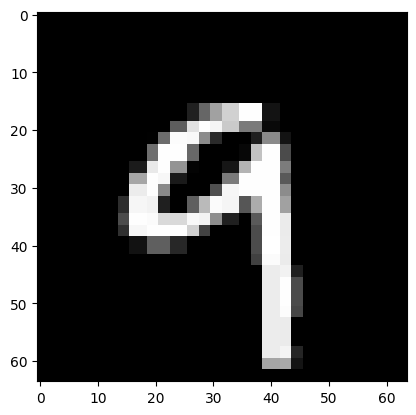

In [32]:
plt.imshow(np.squeeze(samples_images_labels[0][0])), print(samples_images_labels[0][1])

# Networks

## Custom

In [33]:
@keras.saving.register_keras_serializable()
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='sigmoid')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                           self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob

## Backbone Networks

In [34]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [35]:
class VGG16model(tf.keras.Model):
    def __init__(self, base_model):
        super(VGG16model, self).__init__()
        #instantiate base model
        self.base_model = base_model
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='sigmoid')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.base_model, self.flatten, self.dense1, self.dense2]

    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob
    

In [36]:
input_layer = tf.keras.layers.Input(shape=(64, 64, 3))
base_model = VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
base_model.trainable = False



In [37]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

## Model fit and saving

In [38]:
class SavefinalTrainingLogitsProp(keras.callbacks.Callback):
    def on_train_end(self, logs):
        self.out = model.predict(x_train)
        self.prob = tf.nn.softmax(self.out)
        print(self.out.shape, self.prob.shape)

In [39]:
def plot_loss_acc(train_metric_values, val_metric_values, type=None, plt_title=None):
    epochs = range(1, len(train_metric_values) +1)
    plt.plot(epochs, train_metric_values, 'bo', label=f'Training {type}')
    plt.plot(epochs, val_metric_values, 'b', label=f'validation {type}')
    plt.title(plt_title)
    plt.xlabel('Epochs')
    plt.ylabel(f'{type}')
    plt.legend()
    plt.savefig(f"{plt_title}.jpg")
    plt.show()
    
    

In [40]:
def evaluate_model(X_test, y_test, model, batch_size=None):
    result = model.evaluate(X_test, y_test, batch_size=batch_size)
    model_name_loss = f"{model.name} test set Loss: {result[0]}"
    model_name_accuracy = f"{model.name} test set Accuracy: {result[1]}"
    return f"{model_name_loss} -  {model_name_accuracy}"

In [41]:
model_custom = MNISTClassifier()

callbacks = [
    keras.callbacks.ModelCheckpoint(f"{model_custom.name}.keras", save_best_only=True)
]
model_custom.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=['accuracy'])

custom_history = model_custom.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=callbacks)
# model_custom.save('MNISTClassifier')

Epoch 1/10
   1/1575 [..............................] - ETA: 12:01 - loss: 2.6449 - accuracy: 0.0312

2024-03-26 15:05:30.975665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1575/1575 [==============================] - 16s 10ms/step - loss: 0.2044 - accuracy: 0.9431 - val_loss: 0.0793 - val_accuracy: 0.9769
Epoch 2/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0813 - accuracy: 0.9763 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 3/10
1575/1575 [==============================] - 16s 10ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.0520 - val_accuracy: 0.9851
Epoch 4/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0479 - val_accuracy: 0.9856
Epoch 5/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0453 - val_accuracy: 0.9867
Epoch 6/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0472 - val_accuracy: 0.9852
Epoch 7/10
1575/1575 [==============================] - 16s 10ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0452 - val_accurac

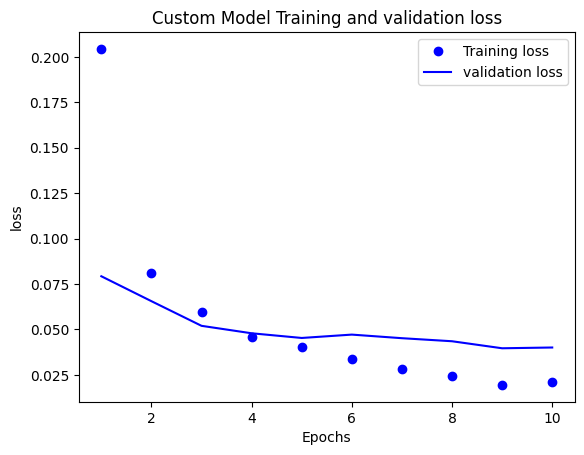

In [42]:
loss_values = custom_history.history["loss"]
val_loss_values = custom_history.history["val_loss"]
type = 'loss'
plot_loss_acc(loss_values, val_loss_values, type=type,  plt_title=f"Custom Model Training and validation {type}")

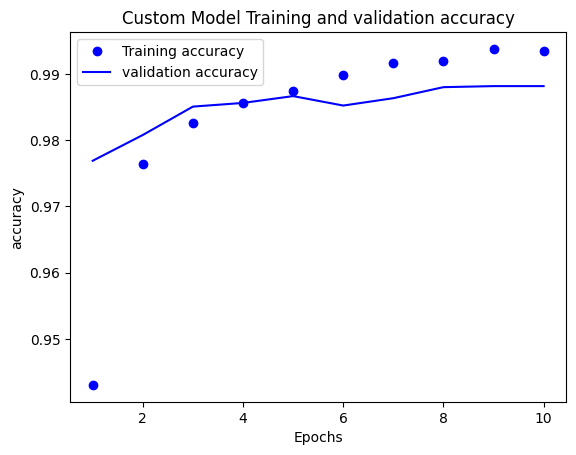

In [43]:
loss_values = custom_history.history["accuracy"]
val_loss_values = custom_history.history["val_accuracy"]
type = 'accuracy'
plot_loss_acc(loss_values, val_loss_values, type=type,  plt_title=f"Custom Model Training and validation {type}")

In [44]:
print(x_test.shape)

(7000, 64, 64, 3)


In [45]:
#7000 datapoints were reserved for testing

model_custom_evaluation_res = evaluate_model(x_test, y_test, model_custom, batch_size=128)

55/55 [==============================] - 1s 9ms/step - loss: 0.0473 - accuracy: 0.9864


In [46]:
print(model_custom_evaluation_res)

mnist_classifier test set Loss: 0.04729561507701874 -  mnist_classifier test set Accuracy: 0.9864285588264465


In [112]:
model_vgg16 = VGG16model(base_model)
model_vgg16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(f"{model_vgg16.name}.keras", save_best_only=True)
]

vgg16_history = model_vgg16.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=callbacks) 
# custom_history = model_custom.fit(x_train, y_train, epochs=10, validation_split=0.2)
# model_vgg16.save('VGG16Classifier')

Epoch 1/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.2081 - accuracy: 0.9440 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 2/10
1575/1575 [==============================] - 34s 21ms/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.0742 - val_accuracy: 0.9757
Epoch 3/10
1575/1575 [==============================] - 34s 21ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.0630 - val_accuracy: 0.9803
Epoch 4/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0592 - val_accuracy: 0.9810
Epoch 5/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 6/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0514 - val_accuracy: 0.9842
Epoch 7/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0605 -

# Load model and make predictions

## prepare images and labels

In [88]:
# twos_tupple = [(11, 2), (20, 2), (24, 2), (37, 2), (46, 2), (56, 2), (60, 2), (65, 2), (68, 2), (78, 2)]
# reshaped_sample_twos = []
# class_arr = []

# for tup in twos_tupple:
#     a_two = x_test[tup[0]]
#     print('a_two.shape', a_two.shape)
#     a_two = np.reshape(a_two, (-1, 64, 64, 3))
#     print('a_two.shape', a_two.shape)
#     a_two_label = y_test[tup[0]]
#     a_two_label = tf.convert_to_tensor(a_two_label)
#     class_arr.append(a_two_label)
#     # print(a_two_label)
#     reshaped_sample_twos.append(a_two)
# reshaped_sample_twos = np.array(reshaped_sample_twos)

In [47]:
reshaped_sample_twos = []
class_arr = []

for item in samples_images_labels:
    reshaped_sample_twos.append(item[0])
    class_arr.append(item[1])


In [48]:
reshaped_sample_twos = np.asanyarray(reshaped_sample_twos)
class_arr = np.asarray(class_arr)

In [49]:
print(reshaped_sample_twos.shape)

(10, 1, 64, 64, 3)


#### We will employ this for batch attack on the whole train set to check the model performance

In [50]:
def preprocess_test_data(x_test=None, y_test=None):
    new_x_test = np.array([np.reshape(img, (-1, 64, 64, 3)) for img in x_test])
    new_class_arr = np.array([tf.convert_to_tensor(label) for label in y_test])
    return [new_x_test, new_class_arr]

In [51]:
new_test_class_arr = preprocess_test_data(x_test, y_test)
new_x_test, new_class_arr = new_test_class_arr[0], new_test_class_arr[1]

4


(None, <matplotlib.image.AxesImage at 0x2d79cc290>)

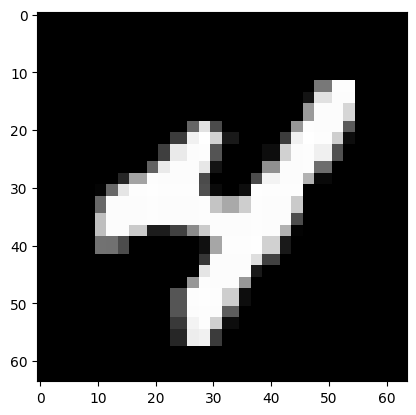

In [52]:
print(new_class_arr[0]), plt.imshow(np.squeeze(new_x_test[0]))

In [53]:
# model_mnist = tf.keras.models.load_model('MNISTClassifier')

predictions = []
for sample in reshaped_sample_twos:
    sample_prediction = model_custom.predict(sample)
    predictions.append(sample_prediction)
#check a prediction
print(np.argmax(predictions[2][1]))

1/1 [==============================] - 0s 9ms/step
8


In [54]:
print(reshaped_sample_twos[0].shape)
# drop first dimension (batch) and prepare for attack
squeze_two = np.squeeze(reshaped_sample_twos[2])
print(squeze_two.shape)
# squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
# squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[35]
y = tf.convert_to_tensor(y)
print(y)
print(x.shape)

(1, 64, 64, 3)
(64, 64, 3)
tf.Tensor(3, shape=(), dtype=uint8)
(1, 64, 64, 3)


# Attack and Plot

In [55]:
num_iter, eps = 50, 0.01

In [112]:
def pgd(model, img, num_iter=50, eps=0.01):
    """
        Performs PGD attack on a given image sample
        Params:
            Model -> A classifier to be attacked
            img -> an image vector of input shape 1, height, width, 3
            num_iter -> maximum number of loops over the image
            eps -> small value for scaling the sign of the gradient
        return:
            a turple of adversarial image and corresponding perturbation
    """
    y = model.predict(img)[0]
    x = tf.identity(img)
    # print(x.shape)
    perturbation = tf.zeros(img.shape, dtype=tf.float32)

    for k in range(num_iter):
        
        with tf.GradientTape() as tape:
            tape.watch(x)
            y_pred = model(x)[0]
            # prin(np.argmax(y_pred))
            if np.argmax(y_pred[0]) != np.argmax(y[0]):
                break
            # print(y_pred == y)
            loss = tf.losses.categorical_crossentropy(y, y_pred, from_logits=True)
            # it's a good practice to use tf.reduce_mean to compute the mean of the losses across all dimensions. 
            #This ensures that the loss is a scalar value, which is the expected input for the gradient calculation
            loss = tf.reduce_mean(loss)
        gradient = tape.gradient(loss, x)
        # print('gra shape', gradient.shape)
        perturbation += eps * tf.sign(gradient)
        x += perturbation
        x = tf.clip_by_value(x, 0, 1)

    return x, perturbation
        
    

In [77]:
# print(a_two_a.shape), plt.imshow(np.squeeze(a_two_a)), print(np.argmax(model_custom.predict(a_two_a)[0]))

In [79]:
a_an_img = reshaped_sample_twos[0]

adv_img, pert = pgd(model_custom, a_an_img)

1/1 [==============================] - 0s 12ms/step
(1, 64, 64, 3)


## Batch attack

In [113]:
def run_attacks(img_arr, class_arr, model, att_func, q=None, thread_id=None, eps=0.001, attack_type=None):
    results = []
    result_thread = {}
    list_of_cur_load = []
    if thread_id == None:
        for img, cls in zip(img_arr, class_arr):
            print(img.shape)
            if type == 'fgsm':
                x_test_adv, perturbation = att_func(model, img, cls, eps)
            elif type == 'deepfool':
                x_test_adv, perturbation = att_func(model, img)
            elif type == 'pgd':
                x_test_adv, perturbation = att_func(model, img)
            results.append((x_test_adv, perturbation))
        return results
    
    else:
        for idx, img_cls  in enumerate(zip(img_arr, class_arr)):
            # takes a batch of images suplied through threading
            #runs runs attacks of the batch based on the attack type
            # puts the result of the attack to a Queue
            # idx = item[0]
            # img_cls = item[1]
            # print(item[0], 'item', '\n', item[1])
            # idx, img_cls
            # break
            cur_img = img_cls[0]
            cur_cls = img_cls[1]
            if attack_type == 'fgsm':
                x_test_adv, perturbation = att_func(model, cur_img, cur_cls, eps)
            elif attack_type == 'deepfool':
                x_test_adv, perturbation = att_func(model, cur_img)
            elif attack_type == 'pgd':
                x_test_adv, perturbation = att_func(model, cur_img)

            
            cur_res_load = {}
            cur_res_load['org_cls'] = cur_cls
            cur_res_load['org_img'] = cur_img
            cur_res_load['adv_img'] = x_test_adv
            cur_res_load['perturbation'] = perturbation
            
            result_thread.setdefault(thread_id, [])
            result_thread[thread_id].append(cur_res_load)
            # cur_tup = (thread_id, cur_res_load)
            # result_thread.append(cur_tup)
            
            # result_thread['thread_id'] = thread_id
            # result_thread['idx'] = idx
            # result_thread['cur_cls'] = cur_cls
            # result_thread['org_img'] = cur_img
            # result_thread['adv_img'] = x_test_adv
            # result_thread['perturbation'] = perturbation
            # result_thread.setdefault(thread_id, [])
            # result_thread[thread_id].append([idx, (cur_cls, cur_img,  x_test_adv, perturbation)])
            # result_thread.setdefault(thread_id, {})
            # result_thread[thread_id].setdefault(idx, {}) 
            # result_thread[thread_id][idx]['cur_cls'] = cur_cls
            # result_thread[thread_id][idx]['org_img'] = cur_img
            # result_thread[thread_id][idx]['adv_img'] = x_test_adv
            # result_thread[thread_id][idx]['perturbation'] = perturbation
            
        q.put(result_thread)
    
    

In [45]:
# from tqdm import tqdm

# # Create a list of numbers
# numbers = list(range(1000))

# # Wrap the list with tqdm()
# for number in tqdm(numbers):
#     # Do something with the number
#     print(number)

In [81]:
attack_results = run_attacks(reshaped_sample_twos, class_arr, model_custom, pgd, attack_type='pgd')

(1, 64, 64, 3)
1/1 [==============================] - 0s 15ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 8ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 9ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 8ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 8ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 9ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 8ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 8ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 9ms/step
(1, 64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 8ms/step
(1, 64, 64, 3)


In [82]:
print(attack_results[0][0].shape)
adv_image = np.squeeze(attack_results[0][0])
# adv_image = np.expand_dims(adv_image, axis=2)
org_image = np.squeeze(reshaped_sample_twos[0])
perturbation = np.squeeze(attack_results[0][1])
org_image.shape
adv_image.shape
# plt.imshow(adv_image, cmap='gray')

(1, 64, 64, 3)


(64, 64, 3)

1/1 [==============================] - 0s 17ms/step
3


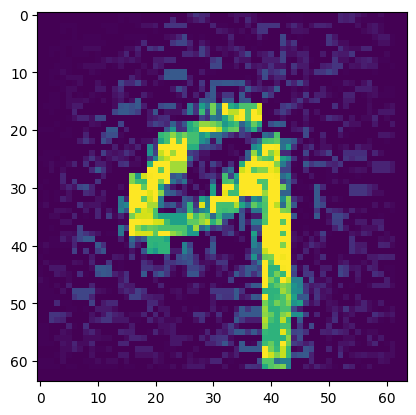

In [83]:
r_adv_image = tf.expand_dims(adv_image, axis=0)

cls_adv_img = np.argmax(model_custom.predict(r_adv_image)[1])
print(cls_adv_img )
plt.imshow(adv_image[:, :,0]) 

In [84]:
print(reshaped_sample_twos.shape)

(10, 1, 64, 64, 3)


(64, 64, 3)
1/1 [==============================] - 0s 16ms/step
9


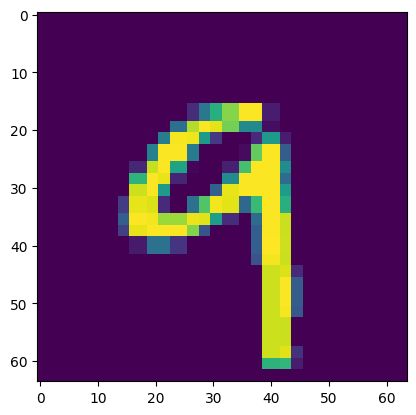

In [85]:
print(org_image.shape)
r_org_image = tf.expand_dims(org_image, axis=0)

cls_org_image = np.argmax(model_custom.predict(r_org_image)[1])
print(cls_org_image )
plt.imshow(org_image[:,:, 0])

# Batch distance measure

In [86]:
# flatten the image array as a 1D array
org_image_flattened = org_image.flatten()
adv_image_flattened = adv_image.flatten()

distance = np.linalg.norm(org_image_flattened - adv_image_flattened)
distance = round(distance, 2)
print(distance)

11.13


In [87]:
def batch_distance_measure(adv_img_arr, org_img_arr):
    l2_norm_distance = []
    for adv_img, org_img in zip(adv_img_arr, org_img_arr):
        cur_adv_img = np.array(adv_img[0])
        # print(cur_adv_img.shape)
        # print(org_img.shape)
        adv_img_flattened = cur_adv_img.flatten()
        org_img_flattened = org_image.flatten()
        distance = np.linalg.norm(org_img_flattened - adv_img_flattened)
        distance = format(distance, '.2f')
        l2_norm_distance.append(distance)
    return l2_norm_distance
        

In [88]:
# l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
# print(l2_norm_distance)

In [89]:
l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
print(l2_norm_distance)

['11.13', '47.21', '38.22', '43.12', '36.79', '40.68', '35.66', '39.24', '37.83', '25.07']


# Visualize predictions and images

In [90]:
# fig = plt.figure(figsize=(10, 10))

# rows = 1
# columns = 3

# fig.add_subplot(rows, columns, 1)
# plt.imshow(org_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Original Image \n predictions: {org_pred}')

# fig.add_subplot(rows, columns, 2)
# plt.imshow(perturbation, cmap='gray')
# plt.axis('off')
# plt.title(f'Pertubation\n /Distance: {distance}')

# fig.add_subplot(rows, columns, 3)
# plt.imshow(adv_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

In [91]:
predi = model_custom.predict(reshaped_sample_twos[0])
reshaped_sample_twos[0].shape
attack_results[0][0].shape
predioo = model_custom.predict(attack_results[0][0])
print(np.argmax(predi), np.argmax(predioo))

1/1 [==============================] - 0s 9ms/step
9 3


In [98]:
def batch_visualization(adv_img_pert_arr, org_img_arr, dist_arr, model=None):
    total_plots = len(dist_arr)
    rows = total_plots
    columns = 3
    for idx in range(total_plots):
        fig = plt.figure(figsize=(10, 10))
        org_pred = model.predict(org_img_arr[idx])[1]
        # print(org_pred)
        # break
        # list_org_pred = list(org_pred)
        # list_org_pred = list_org_pred[1][0]
        org_pred_cls = np.argmax(org_pred)
        org_conf = np.squeeze(org_pred)[org_pred_cls]
        org_conf = format(org_conf, '.1f')
        cur_org_img = org_img_arr[idx]
        fig.add_subplot(rows, columns, 1)
        cur_org_img_sq = np.squeeze(cur_org_img)
        plt.imshow(cur_org_img_sq[:,:, 0])
        plt.axis('off')
        plt.title(f'Original Image \n predictions: {org_pred_cls} \n Confidence {org_conf} ')

        cur_dist = dist_arr[idx]
        fig.add_subplot(rows, columns, 2)
        cur_pert_img = np.squeeze(perturbation)
        plt.imshow(cur_pert_img[:, :, 0])
        plt.axis('off')
        plt.title(f'Pertubation\n /Distance: {cur_dist}')

        cur_adv_img = adv_img_pert_arr[idx][0]
        adv_pred = model.predict(cur_adv_img)
        adv_pred_cls = np.argmax(adv_pred)
        list_adv_pred = list(adv_pred)
        list_adv_pred = list_adv_pred[1][0]
        adv_conf = format(list_adv_pred[adv_pred_cls], '.1f')
        cur_adv_img_sq = np.squeeze(cur_adv_img)
        fig.add_subplot(rows, columns, 3)
        plt.imshow(cur_adv_img_sq[:, :, 0])
        plt.axis('off')
        plt.title(f'Adversarial Image \n Prediction: {adv_pred_cls} \n Confidence {adv_conf}')
    # plt.savefig("PGD_attack_on_CM.jpg")    
    plt.show()

In [99]:
print(reshaped_sample_twos[0].shape)

(1, 64, 64, 3)


1/1 [==============================] - 0s 9ms/step


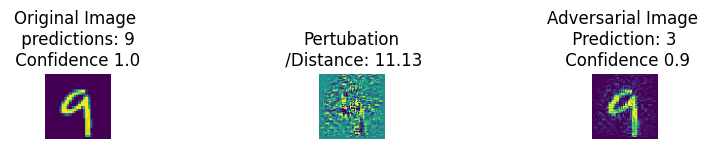

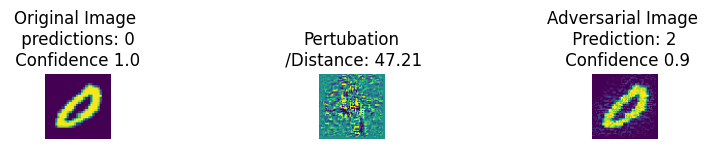

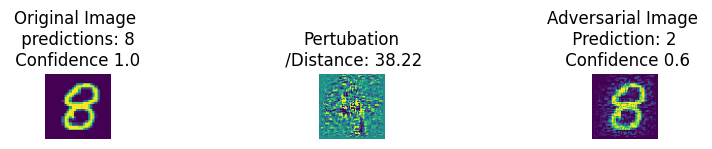

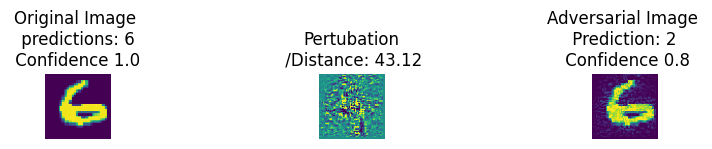

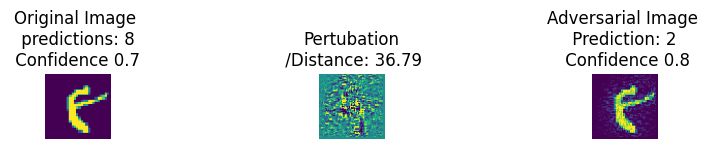

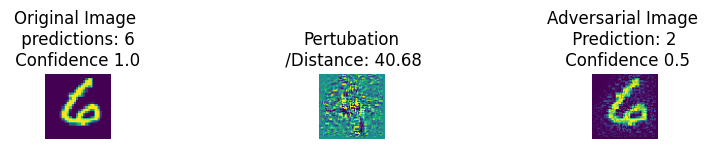

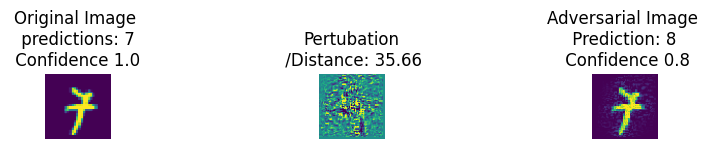

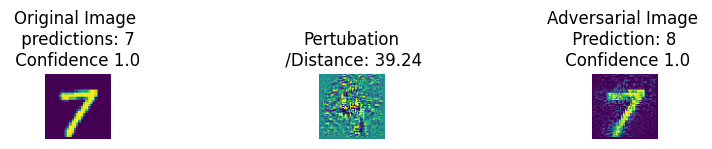

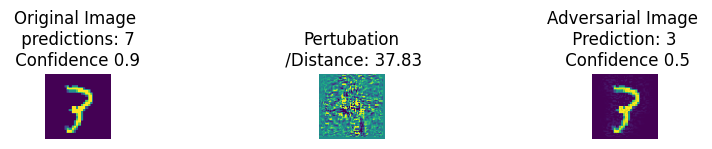

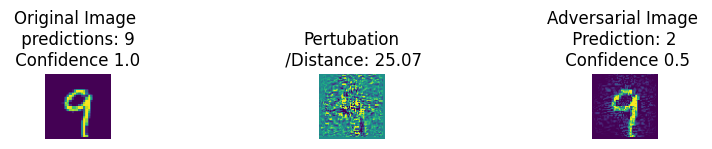

In [100]:
batch_visualization(attack_results, reshaped_sample_twos, l2_norm_distance, model=model_custom)

# Model Evelaution on full test set

In [101]:
preprocessed_test_set = preprocess_test_data(x_test, y_test)
new_x_test, new_class_arr = preprocessed_test_set[0], preprocessed_test_set[1]

4


(None, <matplotlib.image.AxesImage at 0x30215bc90>)

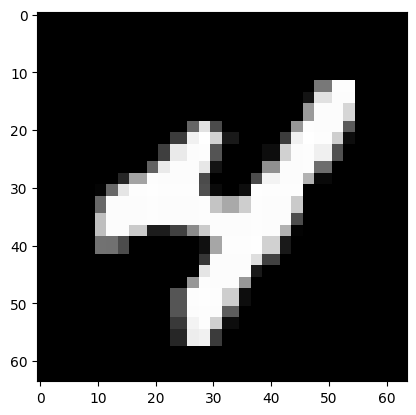

In [102]:
print(new_class_arr[0]), plt.imshow(np.squeeze(new_x_test[0]))

## Leveraging pythons multiprocessing

In [103]:
from multiprocess import Pool
import multiprocess as mp

In [104]:
# returns 12, meaninf 2 CPUs
num_workers = mp.cpu_count()
print(num_workers)
# Distribute the testset among the number of workers, i.e divide into 12 batchs
# funtion to run = 


def convert_x_test_to_batch_of_num_workers(x_test, num_workers):
    k, m = divmod(len(x_test), num_workers)
    split_x_test = [x_test[i*k+min(i,m):(i+1)*k+min(i+1, m)] for i in range(num_workers)]
    split_x_test_with_order_num = [[idx, v] for idx, v in enumerate(split_x_test)]
    # multiprocessing in python does so in no particular order hence, we need the 
    # idx to join the dataset back after processing

    return split_x_test_with_order_num

12


In [105]:
num_workers=100
batched_x_test = convert_x_test_to_batch_of_num_workers(new_x_test, num_workers)
batched_y_test = convert_x_test_to_batch_of_num_workers(new_class_arr, num_workers)

In [107]:
print(len(batched_x_test)), print(len(batched_y_test))

100
100


(None, None)

In [108]:
# # batched_x_test[0][1] is 70 image samples
# print(len(batched_x_test[0][1])), print(batched_x_test[1])

In [109]:
# class threading.Thread(group=None, target=None, name=None, args=(), kwargs={}, *, daemon=None)
# This constructor should always be called with keyword arguments. Arguments are:

# group should be None; reserved for future extension when a ThreadGroup class is implemented.

# target is the callable object to be invoked by the run() method. Defaults to None, meaning nothing is called.

# name is the thread name. By default, a unique name is constructed of the form “Thread-N” where N is a small decimal number, or “Thread-N (target)” where “target” is target.__name__ if the target argument is specified.

In [110]:
import threading
from queue import Queue

In [115]:
queue = Queue()
for item in tqdm(enumerate(zip(batched_x_test, batched_y_test))):
    idx = item[0]
    img_label_batch_pair = item[1]
    # idx, img_label_batch_pair
    image_batch = img_label_batch_pair[0] 
    image_batch = image_batch[1]
    label_batch = img_label_batch_pair[1]
    label_batch = label_batch[1]
    cur_thread = f't{idx}'
    q = queue 
    thread_id = f't{idx}'
    args = (image_batch, label_batch, model_custom, pgd)
    kwargs = {"q":queue, "thread_id": thread_id, "attack_type": "pgd"}
    
    # print(cur_thread)
    cur_thread = threading.Thread(target=run_attacks, args=args, kwargs=kwargs)
    cur_thread.start()
    cur_thread.join()

0it [00:00, ?it/s]

1/1 [==============================] - 0s 8ms/step


1it [00:05,  5.39s/it]

1/1 [==============================] - 0s 8ms/step


2it [00:10,  5.43s/it]

1/1 [==============================] - 0s 8ms/step


3it [00:16,  5.47s/it]

1/1 [==============================] - 0s 9ms/step


4it [00:21,  5.45s/it]

1/1 [==============================] - 0s 8ms/step


5it [00:27,  5.46s/it]

1/1 [==============================] - 0s 10ms/step


6it [00:32,  5.38s/it]

1/1 [==============================] - 0s 8ms/step


7it [00:37,  5.29s/it]

1/1 [==============================] - 0s 8ms/step


8it [00:42,  5.24s/it]

1/1 [==============================] - 0s 8ms/step


9it [00:47,  5.20s/it]

1/1 [==============================] - 0s 8ms/step


10it [00:52,  5.19s/it]

1/1 [==============================] - 0s 9ms/step


11it [00:58,  5.15s/it]

1/1 [==============================] - 0s 8ms/step


12it [01:03,  5.18s/it]

1/1 [==============================] - 0s 8ms/step


13it [01:08,  5.17s/it]

1/1 [==============================] - 0s 8ms/step


14it [01:13,  5.25s/it]

1/1 [==============================] - 0s 8ms/step


15it [01:19,  5.22s/it]

1/1 [==============================] - 0s 9ms/step


16it [01:24,  5.15s/it]

1/1 [==============================] - 0s 9ms/step


17it [01:29,  5.18s/it]

1/1 [==============================] - 0s 8ms/step


18it [01:34,  5.24s/it]

1/1 [==============================] - 0s 9ms/step


19it [01:39,  5.19s/it]

1/1 [==============================] - 0s 9ms/step


20it [01:44,  5.18s/it]

1/1 [==============================] - 0s 9ms/step


21it [01:50,  5.22s/it]

1/1 [==============================] - 0s 9ms/step


22it [01:55,  5.23s/it]

1/1 [==============================] - 0s 8ms/step


23it [02:00,  5.26s/it]

1/1 [==============================] - 0s 9ms/step


24it [02:06,  5.36s/it]

1/1 [==============================] - 0s 9ms/step


25it [02:11,  5.40s/it]

1/1 [==============================] - 0s 8ms/step


26it [02:17,  5.39s/it]

1/1 [==============================] - 0s 8ms/step


27it [02:22,  5.30s/it]

1/1 [==============================] - 0s 9ms/step


28it [02:27,  5.30s/it]

1/1 [==============================] - 0s 8ms/step


29it [02:32,  5.31s/it]

1/1 [==============================] - 0s 9ms/step


30it [02:38,  5.34s/it]

1/1 [==============================] - 0s 8ms/step


31it [02:44,  5.44s/it]

1/1 [==============================] - 0s 10ms/step


32it [02:49,  5.37s/it]

1/1 [==============================] - 0s 9ms/step


33it [02:54,  5.35s/it]

1/1 [==============================] - 0s 8ms/step


34it [02:59,  5.37s/it]

1/1 [==============================] - 0s 10ms/step


35it [03:05,  5.33s/it]

1/1 [==============================] - 0s 8ms/step


36it [03:10,  5.38s/it]

1/1 [==============================] - 0s 8ms/step


37it [03:15,  5.36s/it]

1/1 [==============================] - 0s 9ms/step


38it [03:21,  5.35s/it]

1/1 [==============================] - 0s 8ms/step


39it [03:26,  5.42s/it]

1/1 [==============================] - 0s 8ms/step


40it [03:32,  5.48s/it]

1/1 [==============================] - 0s 9ms/step


41it [03:37,  5.46s/it]

1/1 [==============================] - 0s 8ms/step


42it [03:43,  5.52s/it]

1/1 [==============================] - 0s 8ms/step


43it [03:49,  5.56s/it]

1/1 [==============================] - 0s 9ms/step


44it [03:54,  5.56s/it]

1/1 [==============================] - 0s 8ms/step


45it [04:00,  5.58s/it]

1/1 [==============================] - 0s 8ms/step


46it [04:05,  5.52s/it]

1/1 [==============================] - 0s 9ms/step


47it [04:11,  5.53s/it]

1/1 [==============================] - 0s 9ms/step


48it [04:17,  5.59s/it]

1/1 [==============================] - 0s 9ms/step


49it [04:22,  5.58s/it]

1/1 [==============================] - 0s 9ms/step


50it [04:28,  5.59s/it]

1/1 [==============================] - 0s 9ms/step


51it [04:34,  5.66s/it]

1/1 [==============================] - 0s 8ms/step


52it [04:39,  5.64s/it]

1/1 [==============================] - 0s 8ms/step


53it [04:45,  5.58s/it]

1/1 [==============================] - 0s 9ms/step


54it [04:50,  5.54s/it]

1/1 [==============================] - 0s 9ms/step


55it [04:55,  5.49s/it]

1/1 [==============================] - 0s 8ms/step


56it [05:01,  5.55s/it]

1/1 [==============================] - 0s 9ms/step


57it [05:07,  5.51s/it]

1/1 [==============================] - 0s 9ms/step


58it [05:12,  5.47s/it]

1/1 [==============================] - 0s 9ms/step


59it [05:18,  5.53s/it]

1/1 [==============================] - 0s 8ms/step


60it [05:23,  5.49s/it]

1/1 [==============================] - 0s 9ms/step


61it [05:28,  5.49s/it]

1/1 [==============================] - 0s 9ms/step


62it [05:34,  5.44s/it]

1/1 [==============================] - 0s 8ms/step


63it [05:39,  5.43s/it]

1/1 [==============================] - 0s 8ms/step


64it [05:45,  5.56s/it]

1/1 [==============================] - 0s 8ms/step


65it [05:50,  5.49s/it]

1/1 [==============================] - 0s 8ms/step


66it [05:56,  5.43s/it]

1/1 [==============================] - 0s 9ms/step


67it [06:01,  5.38s/it]

1/1 [==============================] - 0s 9ms/step


68it [06:06,  5.41s/it]

1/1 [==============================] - 0s 9ms/step


69it [06:12,  5.45s/it]

1/1 [==============================] - 0s 8ms/step


70it [06:17,  5.47s/it]

1/1 [==============================] - 0s 9ms/step


71it [06:23,  5.47s/it]

1/1 [==============================] - 0s 9ms/step


72it [06:29,  5.51s/it]

1/1 [==============================] - 0s 10ms/step


73it [06:34,  5.55s/it]

1/1 [==============================] - 0s 9ms/step


74it [06:40,  5.60s/it]

1/1 [==============================] - 0s 9ms/step


75it [06:45,  5.56s/it]

1/1 [==============================] - 0s 9ms/step


76it [06:51,  5.61s/it]

1/1 [==============================] - 0s 9ms/step


77it [06:57,  5.66s/it]

1/1 [==============================] - 0s 8ms/step


78it [07:02,  5.56s/it]

1/1 [==============================] - 0s 10ms/step


79it [07:08,  5.60s/it]

1/1 [==============================] - 0s 9ms/step


80it [07:14,  5.60s/it]

1/1 [==============================] - 0s 9ms/step


81it [07:19,  5.57s/it]

1/1 [==============================] - 0s 9ms/step


82it [07:25,  5.58s/it]

1/1 [==============================] - 0s 9ms/step


83it [07:30,  5.53s/it]

1/1 [==============================] - 0s 9ms/step


84it [07:36,  5.56s/it]

1/1 [==============================] - 0s 9ms/step


85it [07:41,  5.52s/it]

1/1 [==============================] - 0s 9ms/step


86it [07:47,  5.63s/it]

1/1 [==============================] - 0s 9ms/step


87it [07:53,  5.67s/it]

1/1 [==============================] - 0s 8ms/step


88it [07:58,  5.68s/it]

1/1 [==============================] - 0s 8ms/step


89it [08:04,  5.69s/it]

1/1 [==============================] - 0s 10ms/step


90it [08:10,  5.73s/it]

1/1 [==============================] - 0s 9ms/step


91it [08:16,  5.69s/it]

1/1 [==============================] - 0s 9ms/step


92it [08:21,  5.59s/it]

1/1 [==============================] - 0s 9ms/step


93it [08:27,  5.59s/it]

1/1 [==============================] - 0s 21ms/step


94it [08:32,  5.60s/it]

1/1 [==============================] - 0s 9ms/step


95it [08:38,  5.56s/it]

1/1 [==============================] - 0s 9ms/step


96it [08:43,  5.58s/it]

1/1 [==============================] - 0s 9ms/step


97it [08:49,  5.63s/it]

1/1 [==============================] - 0s 9ms/step


98it [08:55,  5.63s/it]

1/1 [==============================] - 0s 9ms/step


99it [09:00,  5.66s/it]

1/1 [==============================] - 0s 9ms/step


100it [09:06,  5.47s/it]


In [116]:
thread_results = {}
while not queue.empty():
    item = queue.get()
    for key, value in item.items():
        thread_results[key] = value
    # thread_results.append(item)
    # for key in item.keys():
    #     thread_results[key] = item

In [117]:
thread_results_keys = thread_results.keys()
thread_results_values = list(thread_results.values())

In [118]:
# the total test dataset is 70 in number. 
# the code below checks if the thread processed 
# the right number of batches
assert len(thread_results_values[0]) == 70
print(len(thread_results_values)) 

100


In [119]:
all_loads = []

for item in thread_results_values:
    destructured = [*item]
    all_loads.extend(destructured)
    # print(item)

In [120]:
print(all_loads[0])

{'org_cls': 4, 'org_img': array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32), 'adv_img': <tf.Tens

In [121]:
df = pd.DataFrame.from_dict(all_loads)
    

In [122]:
df.count()


org_cls         7000
org_img         7000
adv_img         7000
perturbation    7000
dtype: int64

In [123]:
df.isnull().values.any()

False

In [124]:
print(df.head(1))

   org_cls                                            org_img  \
0        4  [[[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...   

                                             adv_img  \
0  (((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...   

                                        perturbation  
0  (((tf.Tensor([0. 0. 0.], shape=(3,), dtype=flo...  


In [145]:
all_test_adv = df['adv_img']
all_test_adv = all_test_adv
all_test_adv = np.concatenate(all_test_adv)

assoc_cls = np.asarray(df['org_cls'])
# assoc_cls = assoc_cls.to_numpy()
# assoc_cls = tf.concat(assoc_cls, axis=0)

assoc_org_img = df['org_img']
assoc_org_img = assoc_org_img
assoc_org_img = np.concatenate(assoc_org_img)

assoc_perturbation = df['perturbation']
assoc_perturbation = assoc_perturbation
assoc_perturbation = np.concatenate(assoc_perturbation)

In [149]:
slice_all_test_adv = all_test_adv[:5]
slice_assoc_cls = assoc_cls[:5]
slice_assoc_org_img = assoc_org_img[:5]

In [147]:
print(slice_all_test_adv.shape), print(x_test.shape), print(slice_assoc_cls.shape)

(5, 64, 64, 3)
(7000, 64, 64, 3)
(5,)


(None, None, None)

In [150]:
print(slice_assoc_cls[0])

4


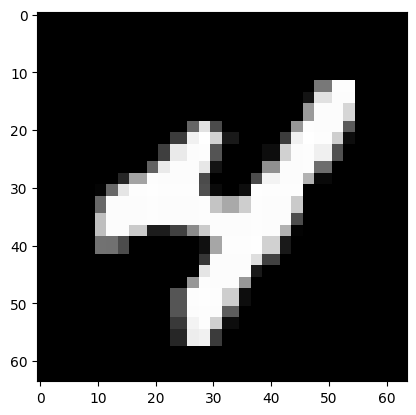

In [151]:
plt.imshow(np.squeeze(slice_assoc_org_img[0]))

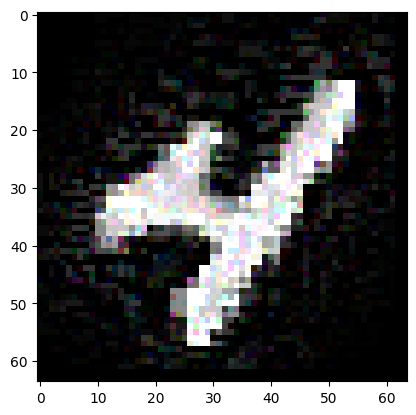

In [152]:
plt.imshow(np.squeeze(slice_all_test_adv[0]))

In [156]:
model_custom_attack_evaluation_res = evaluate_model(slice_all_test_adv, slice_assoc_cls, model_custom, batch_size=128)

1/1 [==============================] - 0s 45ms/step - loss: 3.5180 - accuracy: 0.0000e+00


In [582]:
print(all_test_adv.shape), print(assoc_org_img.shape), print(assoc_perturbation.shape)

(7000, 1, 64, 64, 3)
(7000, 1, 64, 64, 3)
(7000, 1, 64, 64, 3)


(None, None, None)

In [480]:
# all_test_adv.head(1)

In [129]:
an_adv_img = all_test_adv[6999]
an_assoc_org_img = assoc_org_img[6999]
an_assoc_cls = assoc_cls[6999]

In [130]:
print(an_adv_img.shape)

(1, 64, 64, 3)


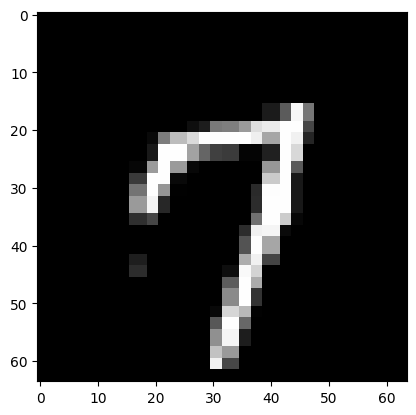

In [131]:
plt.imshow(np.squeeze(an_assoc_org_img))

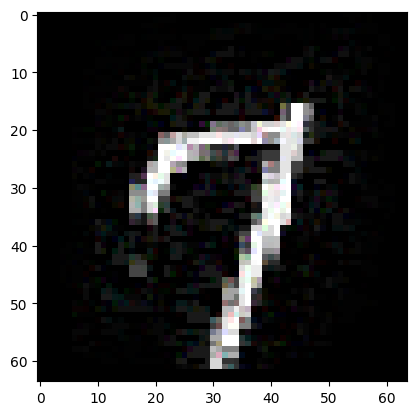

In [132]:
plt.imshow(np.squeeze(an_adv_img))

In [157]:
model_custom_attack_evaluation_res = evaluate_model(all_test_adv, assoc_cls, model_custom, batch_size=128)

55/55 [==============================] - 0s 7ms/step - loss: 2.8482 - accuracy: 0.0049


In [159]:
model_custom_attack_evaluation_res = evaluate_model(x_test, y_test, model_custom, batch_size=128)

55/55 [==============================] - 0s 8ms/step - loss: 0.0473 - accuracy: 0.9864
